# 🍽️ MealCraft-AI: Intelligent Indian Meal Planning

This notebook demonstrates the capabilities of MealCraft-AI, a machine learning-powered meal planning system optimized for Indian cuisine.

## Features
- ✅ Personalized weekly meal plans (7 days × 3 meals)
- ✅ Dietary preference matching (Veg, Non-veg, Vegan, Jain, Keto, etc.)
- ✅ Budget optimization
- ✅ Nutritional goal tracking
- ✅ Regional cuisine preferences
- ✅ Ingredient reuse optimization
- ✅ Shopping list generation
- ✅ Batch cooking suggestions

## Setup

In [20]:
# Import required libraries
from mealcraft_ai import MealCraftAI, UserPreferences
import pandas as pd
import json
from IPython.display import JSON, display, Markdown

print("✅ Imports successful!")

✅ Imports successful!


## Load Dataset

In [21]:
# Load and explore the Indian food dataset
df = pd.read_csv('indian_food_healthy.csv')

print(f"📊 Dataset Statistics:")
print(f"   Total dishes: {len(df)}")
print(f"   Vegetarian: {len(df[df['diet'] == 'vegetarian'])}")
print(f"   Non-Vegetarian: {len(df[df['diet'] == 'non vegetarian'])}")
print(f"\n🗺️  Regional Distribution:")
print(df['region'].value_counts())
print(f"\n🍽️  Course Distribution:")
print(df['course'].value_counts())

# Display sample dishes
df.head(10)

📊 Dataset Statistics:
   Total dishes: 152
   Vegetarian: 123
   Non-Vegetarian: 29

🗺️  Regional Distribution:
region
North         41
South         38
West          35
North East    18
East          12
All            7
Central        1
Name: count, dtype: int64

🍽️  Course Distribution:
course
main course    129
snack           14
dessert          7
starter          2
Name: count, dtype: int64


,name,ingredients,diet,prep_time,cook_time,flavor_profile,course,state,region,total_time,suitable_for
0,Obbattu holige,"Maida flour, turmeric, coconut, chickpeas, jag...",vegetarian,180,60,sweet,main course,Karnataka,South,240,"lunch,dinner"
1,Maach Jhol,"Fish, potol, tomato, chillies, ginger, garlic",non vegetarian,10,40,spicy,main course,Assam,North East,50,"lunch,dinner"
2,Pork Bharta,"Boiled pork, onions, chillies, ginger and garlic",non vegetarian,15,30,spicy,main course,Tripura,North East,45,"lunch,dinner"
3,Galho,"Rice, axone, salt, water, chillies, pork",non vegetarian,5,15,spicy,main course,Nagaland,North East,20,"lunch,dinner"
4,Aloo gobi,"Cauliflower, potato, garam masala, turmeric, c...",vegetarian,10,20,spicy,main course,Punjab,North,30,"lunch,dinner"
5,Aloo tikki,"Rice flour, potato, bread crumbs, garam masala...",vegetarian,5,20,spicy,main course,Punjab,North,25,"lunch,dinner"
6,Aloo matar,"Potato, peas, chillies, ginger, garam masala, ...",vegetarian,5,40,spicy,main course,Punjab,North,45,"lunch,dinner"
7,Aloo methi,"Potato, fenugreek leaves, chillies, salt, oil",vegetarian,10,40,bitter,main course,Punjab,North,50,"lunch,dinner"
8,Aloo shimla mirch,"Potato, shimla mirch, garam masala, amchur pow...",vegetarian,10,40,spicy,main course,Punjab,North,50,"lunch,dinner"
9,Bhatura,"Chole, rava, yogurt, plain flour, baking soda",vegetarian,20,20,spicy,main course,Punjab,North,40,"lunch,dinner"


## Initialize MealCraft-AI

In [22]:
# Initialize the AI system
ai = MealCraftAI('indian_food.csv')
print("🤖 MealCraft-AI initialized successfully!")

🤖 MealCraft-AI initialized successfully!


## Example 1: Vegetarian North Indian Plan (Budget-Conscious)

In [42]:
# Define user preferences
user_prefs_1 = UserPreferences(
    diet="Vegetarian",
    preferred_cuisines=["South Indian"],
    daily_calorie_target=9000,
    weekly_budget=9000,  # Budget-conscious
    preferred_flavors=["spicy", "mild"],
    cooking_time_limit=45,
    region="South",
    goals=["weight loss", "energy"],
    cost_per_meal_limit=100
)

print("🎯 User Profile: Budget-Conscious South Indian Vegetarian")
print(f"   Daily Calories: {user_prefs_1.daily_calorie_target}")
print(f"   Weekly Budget: ₹{user_prefs_1.weekly_budget}")
print(f"   Cost/Meal Limit: ₹{user_prefs_1.cost_per_meal_limit}")

🎯 User Profile: Budget-Conscious South Indian Vegetarian
   Daily Calories: 9000
   Weekly Budget: ₹9000
   Cost/Meal Limit: ₹100


In [44]:
# Generate meal plan
meal_plan_1 = ai.generate_weekly_plan(user_prefs_1)

# Display summary
display(Markdown("### 📊 Weekly Summary"))
summary = meal_plan_1['summary']
print(f"💰 Total Cost: {summary['total_cost']} (Budget: ₹{user_prefs_1.weekly_budget})")
print(f"📈 Budget Status: {summary['budget_status'].upper()}")
print(f"🍽️  Avg Cost/Meal: {summary['avg_cost_per_meal']}")
print(f"🎯 Calorie Accuracy: {summary['calorie_balance_accuracy']}")
print(f"♻️  Ingredient Reuse: {summary['ingredient_overlap_score']}")

### 📊 Weekly Summary

💰 Total Cost: ₹434.08 (Budget: ₹9000)
📈 Budget Status: UNDER
🍽️  Avg Cost/Meal: ₹20.67
🎯 Calorie Accuracy: 20.5%
♻️  Ingredient Reuse: 45.6%


In [41]:
# Display weekly plan
for day in meal_plan_1['weekly_plan']:
    display(Markdown(f"### 📅 {day['day']}"))
    for meal_type, meal in day['meals'].items():
        print(f"\n🍴 {meal_type.upper()}")
        print(f"   Dish: {meal['dish']}")
        print(f"   Time: {meal['time']} | Cost: {meal['cost']}")
        print(f"   Nutrition: {meal['calories']} | Protein: {meal['protein']}")
        print(f"   Reason: {meal['reason']}")
    print("-" * 60)

### 📅 Monday


🍴 BREAKFAST
   Dish: Vada
   Time: 35 min | Cost: ₹16.92
   Nutrition: 343 kcal | Protein: 25.5g
   Reason: budget-friendly, high protein, regional South dish

🍴 LUNCH
   Dish: Currivepillai sadam 
   Time: 30 min | Cost: ₹19.5
   Nutrition: 953 kcal | Protein: 65.3g
   Reason: budget-friendly, quick to prepare, high protein

🍴 DINNER
   Dish: Kothamali sadam
   Time: 30 min | Cost: ₹21.5
   Nutrition: 829 kcal | Protein: 51.4g
   Reason: budget-friendly, quick to prepare, high protein
------------------------------------------------------------


### 📅 Tuesday


🍴 BREAKFAST
   Dish: Uttapam
   Time: 30 min | Cost: ₹29.0
   Nutrition: 315 kcal | Protein: 17.2g
   Reason: budget-friendly, quick to prepare, high protein

🍴 LUNCH
   Dish: Kos kootu
   Time: 30 min | Cost: ₹19.0
   Nutrition: 960 kcal | Protein: 64.2g
   Reason: budget-friendly, quick to prepare, high protein

🍴 DINNER
   Dish: Koshambri
   Time: 30 min | Cost: ₹16.0
   Nutrition: 810 kcal | Protein: 57.8g
   Reason: budget-friendly, quick to prepare, high protein
------------------------------------------------------------


### 📅 Wednesday


🍴 BREAKFAST
   Dish: Papadum
   Time: 10 min | Cost: ₹15.0
   Nutrition: 398 kcal | Protein: 0.0g
   Reason: budget-friendly, quick to prepare, regional South dish

🍴 LUNCH
   Dish: Keerai masiyal
   Time: -2 min | Cost: ₹16.83
   Nutrition: 759 kcal | Protein: 32.3g
   Reason: budget-friendly, quick to prepare, high protein

🍴 DINNER
   Dish: Poriyal
   Time: -2 min | Cost: ₹18.83
   Nutrition: 742 kcal | Protein: 50.6g
   Reason: budget-friendly, quick to prepare, high protein
------------------------------------------------------------


### 📅 Thursday


🍴 BREAKFAST
   Dish: Mysore pak
   Time: 25 min | Cost: ₹31.58
   Nutrition: 288 kcal | Protein: 3.2g
   Reason: budget-friendly, quick to prepare, regional South dish

🍴 LUNCH
   Dish: Kootu
   Time: 25 min | Cost: ₹24.58
   Nutrition: 587 kcal | Protein: 37.8g
   Reason: budget-friendly, quick to prepare, high protein

🍴 DINNER
   Dish: Paniyaram
   Time: 30 min | Cost: ₹15.0
   Nutrition: 774 kcal | Protein: 18.2g
   Reason: budget-friendly, quick to prepare, high protein
------------------------------------------------------------


### 📅 Friday


🍴 BREAKFAST
   Dish: Unni Appam
   Time: 30 min | Cost: ₹15.0
   Nutrition: 256 kcal | Protein: 1.6g
   Reason: budget-friendly, quick to prepare, regional South dish

🍴 LUNCH
   Dish: Kuzhambu
   Time: 35 min | Cost: ₹19.42
   Nutrition: 451 kcal | Protein: 31.5g
   Reason: budget-friendly, high protein, regional South dish

🍴 DINNER
   Dish: Puli sadam
   Time: 30 min | Cost: ₹18.5
   Nutrition: 685 kcal | Protein: 42.8g
   Reason: budget-friendly, quick to prepare, high protein
------------------------------------------------------------


### 📅 Saturday


🍴 BREAKFAST
   Dish: Kajjikaya
   Time: 55 min | Cost: ₹15.0
   Nutrition: 256 kcal | Protein: 1.6g
   Reason: budget-friendly, regional South dish

🍴 LUNCH
   Dish: Keerai kootu
   Time: 50 min | Cost: ₹27.67
   Nutrition: 1157 kcal | Protein: 41.5g
   Reason: budget-friendly, high protein, regional South dish

🍴 DINNER
   Dish: Keerai poriyal
   Time: 50 min | Cost: ₹18.17
   Nutrition: 800 kcal | Protein: 59.5g
   Reason: budget-friendly, high protein, regional South dish
------------------------------------------------------------


### 📅 Sunday


🍴 BREAKFAST
   Dish: Pongal
   Time: 25 min | Cost: ₹37.08
   Nutrition: 334 kcal | Protein: 5.3g
   Reason: budget-friendly, quick to prepare, regional South dish

🍴 LUNCH
   Dish: Paruppu sadam
   Time: 30 min | Cost: ₹17.5
   Nutrition: 556 kcal | Protein: 37.2g
   Reason: budget-friendly, quick to prepare, high protein

🍴 DINNER
   Dish: Thayir sadam
   Time: 30 min | Cost: ₹22.0
   Nutrition: 684 kcal | Protein: 32.8g
   Reason: budget-friendly, quick to prepare, high protein
------------------------------------------------------------


## Example 2: High-Protein Non-Vegetarian Plan (Muscle Gain)

In [7]:
# Define user preferences for high-protein plan
user_prefs_2 = UserPreferences(
    diet="High-Protein",
    preferred_cuisines=["North Indian", "South Indian"],
    daily_calorie_target=2500,  # Higher for muscle gain
    weekly_budget=1500,  # More budget for protein sources
    preferred_flavors=["spicy"],
    cooking_time_limit=60,
    region="All",
    goals=["muscle gain", "high-protein"],
    cost_per_meal_limit=90
)

print("🎯 User Profile: High-Protein for Muscle Gain")
print(f"   Daily Calories: {user_prefs_2.daily_calorie_target}")
print(f"   Weekly Budget: ₹{user_prefs_2.weekly_budget}")
print(f"   Goals: {', '.join(user_prefs_2.goals)}")

🎯 User Profile: High-Protein for Muscle Gain
   Daily Calories: 2500
   Weekly Budget: ₹1500
   Goals: muscle gain, high-protein


In [8]:
# Generate meal plan
meal_plan_2 = ai.generate_weekly_plan(user_prefs_2)

# Display summary
display(Markdown("### 📊 Weekly Summary"))
summary = meal_plan_2['summary']
print(f"💰 Total Cost: {summary['total_cost']}")
print(f"💪 Daily Avg Protein: {summary['daily_avg_protein']}")
print(f"🔥 Daily Avg Calories: {summary['daily_avg_calories']}")
print(f"📈 Budget Status: {summary['budget_status'].upper()}")

### 📊 Weekly Summary

💰 Total Cost: ₹391.41
💪 Daily Avg Protein: 102.5g
🔥 Daily Avg Calories: 2046.0
📈 Budget Status: UNDER


## Example 3: Vegan South Indian Plan

In [9]:
# Define vegan preferences
user_prefs_3 = UserPreferences(
    diet="Vegan",
    preferred_cuisines=["South Indian"],
    daily_calorie_target=1800,
    weekly_budget=1100,
    preferred_flavors=["spicy", "sour"],
    cooking_time_limit=40,
    region="South",
    goals=["immunity", "energy"],
    cost_per_meal_limit=65
)

meal_plan_3 = ai.generate_weekly_plan(user_prefs_3)

print("🌱 Vegan South Indian Meal Plan Generated")
print(f"Total Cost: {meal_plan_3['summary']['total_cost']}")
print(f"Budget Status: {meal_plan_3['summary']['budget_status']}")

🌱 Vegan South Indian Meal Plan Generated
Total Cost: ₹361.75
Budget Status: under


## Shopping List & Batch Cooking

In [10]:
# Display shopping list for Example 1
display(Markdown("### 🛒 Shopping List (Top Ingredients)"))
shopping_list = meal_plan_1['shopping_list']
for idx, (ingredient, count) in enumerate(list(shopping_list.items())[:15], 1):
    print(f"{idx:2d}. {ingredient.title():30s} → Used {count}x")

### 🛒 Shopping List (Top Ingredients)

 1. Garam Masala                   → Used 13x
 2. Ginger                         → Used 8x
 3. Potato                         → Used 5x
 4. Cottage Cheese                 → Used 3x
 5. Cream                          → Used 3x
 6. Chillies                       → Used 3x
 7. Palak                          → Used 2x
 8. Chole                          → Used 2x
 9. Malai                          → Used 2x
10. Butter                         → Used 2x
11. Paneer                         → Used 2x
12. Salt                           → Used 2x
13. Yogurt                         → Used 2x
14. Kasuri Methi                   → Used 2x
15. Tomatoes                       → Used 2x


In [11]:
# Display batch cooking suggestions
display(Markdown("### 👨‍🍳 Batch Cooking Suggestions"))
for idx, suggestion in enumerate(meal_plan_1['batch_cooking_suggestions'], 1):
    print(f"{idx}. {suggestion}")

### 👨‍🍳 Batch Cooking Suggestions

1. Batch prep garam masala - used on days Monday, Monday, Tuesday
2. Batch prep ginger - used on days Monday, Tuesday, Thursday
3. Batch prep cottage cheese - used on days Tuesday, Tuesday, Wednesday
4. Batch prep cream - used on days Tuesday, Tuesday, Wednesday
5. Batch prep potato - used on days Tuesday, Wednesday, Thursday


## Nutrition Analysis

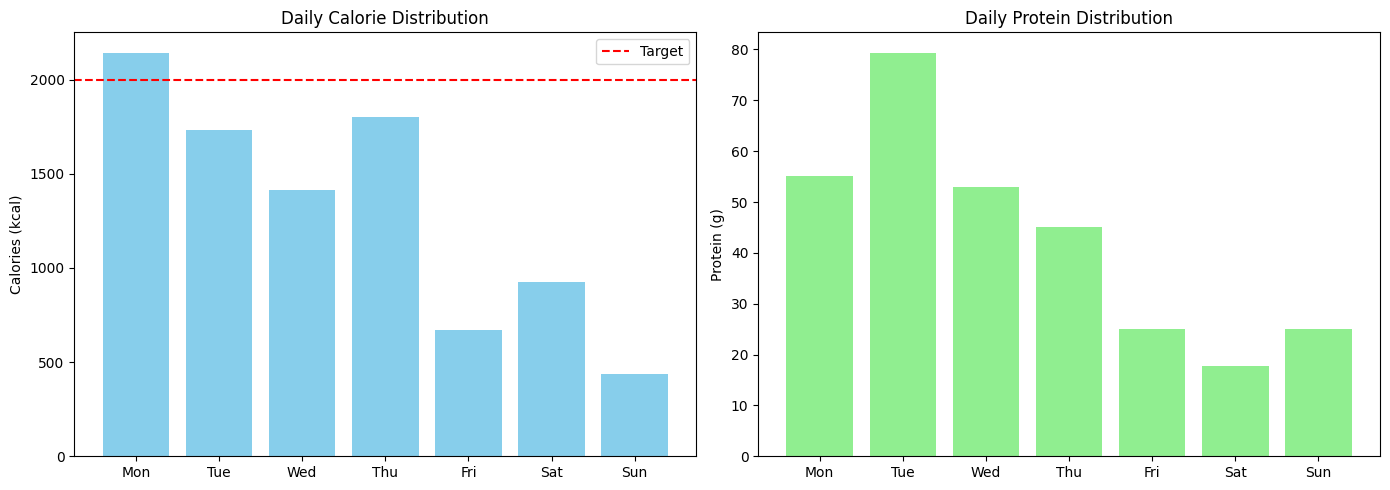


📊 Average Daily Calories: 1304 kcal
💪 Average Daily Protein: 42.9g


In [12]:
# Analyze nutrition distribution across the week
import matplotlib.pyplot as plt

days = []
daily_calories = []
daily_protein = []

for day in meal_plan_1['weekly_plan']:
    days.append(day['day'][:3])  # Abbreviate day names
    day_cal = sum(float(meal['calories'].split()[0]) for meal in day['meals'].values())
    day_prot = sum(float(meal['protein'].replace('g', '')) for meal in day['meals'].values())
    daily_calories.append(day_cal)
    daily_protein.append(day_prot)

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Calories chart
ax1.bar(days, daily_calories, color='skyblue')
ax1.axhline(y=user_prefs_1.daily_calorie_target, color='r', linestyle='--', label='Target')
ax1.set_ylabel('Calories (kcal)')
ax1.set_title('Daily Calorie Distribution')
ax1.legend()

# Protein chart
ax2.bar(days, daily_protein, color='lightgreen')
ax2.set_ylabel('Protein (g)')
ax2.set_title('Daily Protein Distribution')

plt.tight_layout()
plt.show()

print(f"\n📊 Average Daily Calories: {sum(daily_calories)/7:.0f} kcal")
print(f"💪 Average Daily Protein: {sum(daily_protein)/7:.1f}g")

## Cost Analysis

In [ ]:
# Analyze cost distribution
days = []
daily_costs = []

for day in meal_plan_1['weekly_plan']:
    days.append(day['day'][:3])
    day_cost = sum(float(meal['cost'].replace('₹', '')) for meal in day['meals'].values())
    daily_costs.append(day_cost)

plt.figure(figsize=(10, 5))
plt.bar(days, daily_costs, color='lightcoral')
plt.axhline(y=user_prefs_1.weekly_budget/7, color='g', linestyle='--', label='Budget/Day')
plt.ylabel('Cost (₹)')
plt.title('Daily Cost Distribution')
plt.legend()
plt.show()

print(f"\n💰 Total Weekly Cost: ₹{sum(daily_costs):.2f}")
print(f"📊 Average Daily Cost: ₹{sum(daily_costs)/7:.2f}")
print(f"🎯 Budget Utilization: {(sum(daily_costs)/user_prefs_1.weekly_budget)*100:.1f}%")

## Export Meal Plan

In [13]:
# Save to JSON file
with open('meal_plan_export.json', 'w', encoding='utf-8') as f:
    json.dump(meal_plan_1, f, indent=2, ensure_ascii=False)

print("✅ Meal plan exported to: meal_plan_export.json")

# Display JSON structure
display(JSON(meal_plan_1, expanded=False))

✅ Meal plan exported to: meal_plan_export.json


<IPython.core.display.JSON object>

## Test Different Scenarios

In [14]:
# Compare different diet types
test_scenarios = [
    {"name": "Budget Vegetarian", "diet": "Vegetarian", "budget": 800, "region": "North"},
    {"name": "Premium Non-Veg", "diet": "Non-Vegetarian", "budget": 1800, "region": "All"},
    {"name": "South Indian Vegan", "diet": "Vegan", "budget": 1000, "region": "South"},
    {"name": "Keto Plan", "diet": "Keto", "budget": 1400, "region": "All"},
]

comparison_results = []

for scenario in test_scenarios:
    prefs = UserPreferences(
        diet=scenario['diet'],
        preferred_cuisines=[],
        daily_calorie_target=2000,
        weekly_budget=scenario['budget'],
        preferred_flavors=["spicy"],
        cooking_time_limit=45,
        region=scenario['region'],
        goals=[],
        cost_per_meal_limit=scenario['budget'] / 21
    )
    
    plan = ai.generate_weekly_plan(prefs)
    
    comparison_results.append({
        "Scenario": scenario['name'],
        "Total Cost": plan['summary']['total_cost'],
        "Budget Status": plan['summary']['budget_status'],
        "Avg Calories": plan['summary']['daily_avg_calories'],
        "Avg Protein": plan['summary']['daily_avg_protein']
    })

# Display comparison
comparison_df = pd.DataFrame(comparison_results)
display(Markdown("### 📊 Scenario Comparison"))
display(comparison_df)

### 📊 Scenario Comparison

,Scenario,Total Cost,Budget Status,Avg Calories,Avg Protein
0,Budget Vegetarian,₹433.99,under,1391.0,41.2g
1,Premium Non-Veg,₹388.07,under,1821.0,84.6g
2,South Indian Vegan,₹361.75,under,1620.0,82.1g
3,Keto Plan,₹368.4,under,1804.0,76.6g


## Conclusion

MealCraft-AI successfully generates:
- ✅ Personalized weekly meal plans
- ✅ Budget-optimized recommendations
- ✅ Nutritionally balanced meals
- ✅ Regional cuisine preferences
- ✅ Shopping lists and batch cooking tips

The system is deterministic, repeatable, and optimized for real-world Indian kitchens!